In [1]:
import pandas as pd
import simpy
import statistics as st
import matplotlib.pyplot as plt
import math as m

In [2]:
base_dados = pd.read_csv("DoaçãoRim.csv", sep=",")

## Mantendo apenas os dados que serão utilizados 

In [3]:
base_dados = base_dados.drop(columns=["age_cat","time_on_Dialysis","date_acutal","Time_death","Transplant_Y_N","X36MthsTx","Time_Tx","event","razon_removed"])

base_dados.head()

,date,age_at_list_registration,prior_transplant,number_prior_transplant,patient_still_on_list,death,Transplant,removed_list,time
0,29/06/2017,67,Não,0,Sim,Não,Não,Não,392
1,03/11/2008,58,Não,0,Não,Sim,Óbito Lista,Não,2066
2,13/07/2010,51,Não,0,Não,Não,Não,Sim,365
3,03/10/2011,52,Sim,1,Não,Não,Não,Sim,365
4,05/07/2006,67,Não,0,Não,Sim,Óbito Lista,Não,194


# Ordenando base de dados em linha do tempo crescente com recorte temporal para 2016

In [4]:
base_dados['date'] = pd.to_datetime(base_dados['date'], dayfirst=True)
base_dados = base_dados.sort_values('date')
base_dados['chegada'] = (base_dados['date'] - base_dados['date'].min()).dt.days
base_dados['final_date'] = base_dados['date'] + pd.to_timedelta(base_dados['time'], unit='D')

number_of_transplants_per_year = []

currentYear = 2000
for i in range(17):
    dados_filtrados = base_dados.loc[(base_dados['final_date'].dt.year == currentYear) & (base_dados['Transplant'] == 'Sim')]
    try:
        contagem_sim_condicional = dados_filtrados['Transplant'].value_counts()['Sim']
        number_of_transplants_per_year.append(contagem_sim_condicional)
        print("Número de transplantes ocorridos em ", currentYear, ": ", contagem_sim_condicional)
    except:
        contagem_sim_condicional = 0
        print("Não houveram transplantes no ano", currentYear)
    currentYear = currentYear + 1

dados_filtrados = base_dados[base_dados['date'].dt.year == 2016]
print("Array total com numero de transplants por ano:", number_of_transplants_per_year)

display(dados_filtrados)


Não houveram transplantes no ano 2000
Número de transplantes ocorridos em  2001 :  30
Número de transplantes ocorridos em  2002 :  99
Número de transplantes ocorridos em  2003 :  227
Número de transplantes ocorridos em  2004 :  325
Número de transplantes ocorridos em  2005 :  283
Número de transplantes ocorridos em  2006 :  306
Número de transplantes ocorridos em  2007 :  359
Número de transplantes ocorridos em  2008 :  528
Número de transplantes ocorridos em  2009 :  744
Número de transplantes ocorridos em  2010 :  1111
Número de transplantes ocorridos em  2011 :  1112
Número de transplantes ocorridos em  2012 :  1197
Número de transplantes ocorridos em  2013 :  1224
Número de transplantes ocorridos em  2014 :  1354
Número de transplantes ocorridos em  2015 :  1371
Número de transplantes ocorridos em  2016 :  1355
Array total com numero de transplants por ano: [30, 99, 227, 325, 283, 306, 359, 528, 744, 1111, 1112, 1197, 1224, 1354, 1371, 1355]


,date,age_at_list_registration,prior_transplant,number_prior_transplant,patient_still_on_list,death,Transplant,removed_list,time,chegada,final_date
35160,2016-01-02,47,Não,0,Sim,Não,Não,Não,936,5843,2018-07-26
34213,2016-01-02,72,Não,0,Não,Não,Não,Sim,794,5843,2018-03-06
4202,2016-01-02,62,Não,0,Não,Sim,Óbito Lista,Não,122,5843,2016-05-03
18588,2016-01-02,55,Não,0,Não,Sim,Óbito Lista,Não,290,5843,2016-10-18
26760,2016-01-02,38,Não,0,Não,Não,Sim,Não,193,5843,2016-07-13
...,...,...,...,...,...,...,...,...,...,...,...
20840,2016-12-28,71,Sim,2,Não,Sim,Sim,Não,335,6204,2017-11-28
44492,2016-12-28,60,Não,0,Sim,Não,Não,Não,575,6204,2018-07-26
2526,2016-12-28,55,Não,0,Não,Não,Sim,Não,331,6204,2017-11-24
45088,2016-12-29,1,Não,0,Sim,Não,Não,Não,574,6205,2018-07-26


In [5]:
# Adiciona um id para cada paciente
base_dados['Id'] = base_dados.reset_index().rename(columns={'index': 'ID'})['ID']
base_dados['number_prior_transplant'] = base_dados['number_prior_transplant'].replace({0: 1, 1: 0})

idPaciente = base_dados['Id']
dataChegada = base_dados['chegada']
transplanteOcorreu = dados_filtrados['Transplant'].replace({'Sim': True, 'Não': False, 'Óbito Lista': False})
transplanteOcorreu = transplanteOcorreu.values
prioridade = base_dados['number_prior_transplant']
tempo = base_dados['time']

base_dados.head()

print(len(transplanteOcorreu))
for i in range(50):
    print(transplanteOcorreu[i])

4336
False
False
False
False
True
False
False
False
True
True
False
False
False
False
True
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True


### Tratamento de dados removendo outliers para visualizar tempo médio de espera 

1084.2708034805723


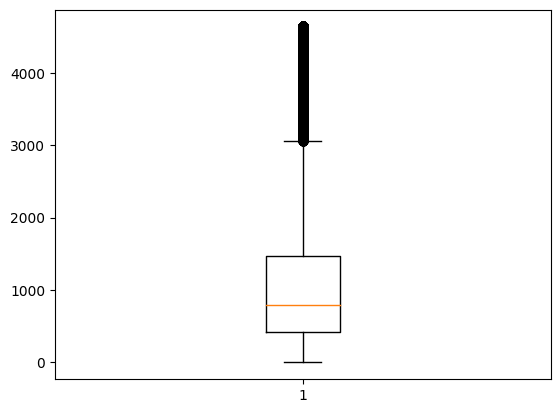

In [6]:
time_in_days = base_dados['time']

a = st.quantiles(time_in_days)[2]-st.quantiles(time_in_days)[0]
piso = st.quantiles(time_in_days)[0] - 3*a
teto = st.quantiles(time_in_days)[2] + 3*a
base_dados_sem_outliers_time = base_dados
base_dados_sem_outliers_time['time'] = base_dados['time'].clip(lower=piso, upper=teto)

plt.boxplot(base_dados_sem_outliers_time['time']);
print(st.mean(base_dados_sem_outliers_time['time']))

### Histograma

16.45265705323073
16
289.875


<function matplotlib.pyplot.show(close=None, block=None)>

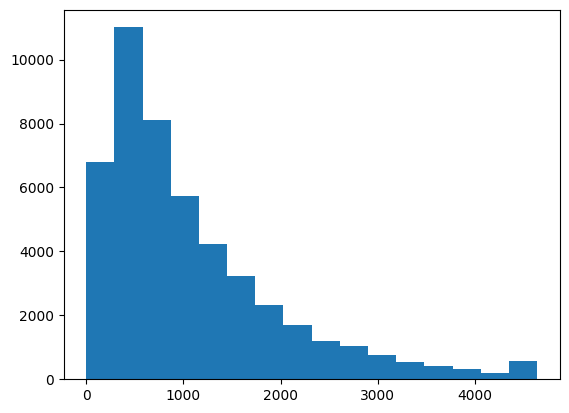

In [7]:
#k é o número de classes
#h é o histograma

time_in_days = base_dados_sem_outliers_time['time']

a = 1 + 3.3*m.log10(len(time_in_days))
k = round(a)
h = (max(time_in_days) - min(time_in_days))/k

print(a)
print(k)
print(h)

plt.hist(time_in_days, bins=k)
plt.show

In [40]:
def transplantes_brasil(env, recurso, paciente, chegada, transplanteOcorreu, prioridade, saida):
    yield env.timeout(chegada)

    with recurso.request(priority=prioridade) as req:
        yield req
        print("Paciente:", paciente, 'entrou na fila em', env.now)
        yield env.timeout(saida)
        if transplanteOcorreu:
            print("Paciente:", paciente, 'foi transplantado em', env.now)
        else:    
            print("Paciente:", paciente, "saiu (morte ou desistência) da fila em", env.now)

env = simpy.Environment()
recurso = simpy.PriorityResource(env, capacity=40) #1355/12 == 113
for i in range(4336):
    # print(transplanteOcorreu[i])
    env.process(transplantes_brasil(env, recurso, idPaciente[i], dataChegada[i], transplanteOcorreu[i], prioridade[i], 30))

env.run()

Paciente: 10829 entrou na fila em 1
Paciente: 28203 entrou na fila em 3
Paciente: 34974 entrou na fila em 3
Paciente: 20637 entrou na fila em 3
Paciente: 4657 entrou na fila em 3
Paciente: 41124 entrou na fila em 14
Paciente: 3416 entrou na fila em 15
Paciente: 38619 entrou na fila em 22
Paciente: 6807 entrou na fila em 22
Paciente: 10829 saiu (morte ou desistência) da fila em 31
Paciente: 9741 entrou na fila em 32
Paciente: 28203 saiu (morte ou desistência) da fila em 33
Paciente: 34974 foi transplantado em 33
Paciente: 20637 foi transplantado em 33
Paciente: 4657 saiu (morte ou desistência) da fila em 33
Paciente: 28756 entrou na fila em 35
Paciente: 25385 entrou na fila em 36
Paciente: 18076 entrou na fila em 43
Paciente: 41124 saiu (morte ou desistência) da fila em 44
Paciente: 3416 saiu (morte ou desistência) da fila em 45
Paciente: 7605 entrou na fila em 46
Paciente: 5999 entrou na fila em 46
Paciente: 38619 foi transplantado em 52
Paciente: 6807 foi transplantado em 52
Paciente: